In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib import pyplot as plt
import numpy as np

In [32]:
# Read the dataset
data = pd.read_csv('Datasets/Cleaned_prepared_data.csv')

In [33]:
# Selecting the features and targets
features = data[['latitude', 'longitude', 'baro_altitude', 'ground_speed', 'track', 'vertical_rate', 'Climbing', 'Descending', 'Cruise']]
targets = data[['latitude_in_10min', 'longitude_in_10min', 'baro_altitude_in_10min']]

In [34]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.5, random_state=42)

In [35]:
# Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

In [36]:
# Creating an XGBoost Regression model
#model = XGBRegressor(random_state=42)
model = XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.05, max_depth = 7, n_estimators = 300, subsample = 0.8, random_state=42)

# Training the model
model.fit(X_train, y_train)

# The model is now trained and can be used for predictions
print("Model trained successfully")

Model trained successfully


In [37]:
# Predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluating the model
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print("MAE and R2 scores:", mae_train, mae_test, r2_train, r2_test)

MAE and R2 scores: 198.56736420507025 230.3452554206726 0.9906369589154633 0.9849763364728729


In [38]:
# Separating the predictions and true values for latitude, longitude, and altitude
train_lat_true, train_long_true, train_alt_true = y_train['latitude_in_10min'], y_train['longitude_in_10min'], y_train['baro_altitude_in_10min']
test_lat_true, test_long_true, test_alt_true = y_test['latitude_in_10min'], y_test['longitude_in_10min'], y_test['baro_altitude_in_10min']
train_lat_pred, train_long_pred, train_alt_pred = train_predictions[:, 0], train_predictions[:, 1], train_predictions[:, 2]
test_lat_pred, test_long_pred, test_alt_pred = test_predictions[:, 0], test_predictions[:, 1], test_predictions[:, 2]

# Calculating and printing metrics for latitude, longitude, and altitude
mae_train_lat = mean_absolute_error(train_lat_true, train_lat_pred)
mae_test_lat = mean_absolute_error(test_lat_true, test_lat_pred)
r2_train_lat = r2_score(train_lat_true, train_lat_pred)
r2_test_lat = r2_score(test_lat_true, test_lat_pred)

mae_train_long = mean_absolute_error(train_long_true, train_long_pred)
mae_test_long = mean_absolute_error(test_long_true, test_long_pred)
r2_train_long = r2_score(train_long_true, train_long_pred)
r2_test_long = r2_score(test_long_true, test_long_pred)

mae_train_alt = mean_absolute_error(train_alt_true, train_alt_pred)
mae_test_alt = mean_absolute_error(test_alt_true, test_alt_pred)
r2_train_alt = r2_score(train_alt_true, train_alt_pred)
r2_test_alt = r2_score(test_alt_true, test_alt_pred)

print("Latitude metrics:", mae_train_lat, mae_test_lat, r2_train_lat, r2_test_lat)
print("Longitude metrics:", mae_train_long, mae_test_long, r2_train_long, r2_test_long)
print("Altitude metrics:", mae_train_alt, mae_test_alt, r2_train_alt, r2_test_alt)

Latitude metrics: 0.04940412124466438 0.052664866367205895 0.9994519229303491 0.9991926032682277
Longitude metrics: 0.06402388121393071 0.07032678879354977 0.9958148672094422 0.9899660697974484
Altitude metrics: 595.588664612753 690.9127746068579 0.9766440866065955 0.9657703363529383


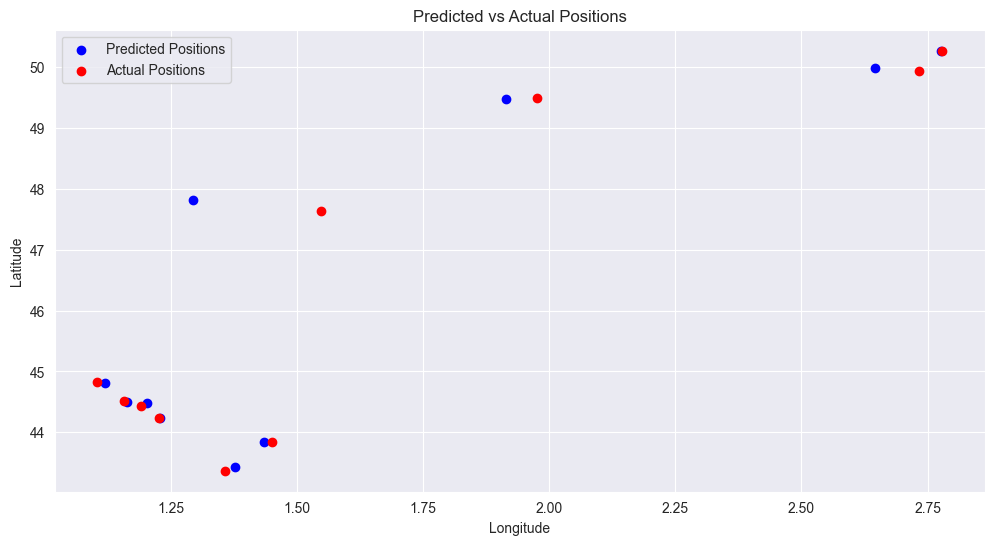

In [39]:
# Selecting a few random samples from the test dataset for prediction
np.random.seed(8)
sample_indices = np.random.choice(X_test.index, size=10, replace=False)
sample_data = X_test.loc[sample_indices]

# Using the model to predict the latitude and longitude in 10 minutes
predicted_positions = model.predict(sample_data)

# Actual positions for comparison
actual_positions = y_test.loc[sample_indices]

# Visualization
plt.figure(figsize=(12, 6))

# Plotting predicted positions
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='blue', label='Predicted Positions')

# Plotting actual positions
plt.scatter(actual_positions['longitude_in_10min'], actual_positions['latitude_in_10min'], color='red',
            label='Actual Positions')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted vs Actual Positions')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Selecting a few example data points from the test set
example_data = X_test.sample(10, random_state=1)

# Actual values for comparison
actual_values = y_test.loc[example_data.index]

# Making predictions
predictions = model.predict(example_data)

# Creating a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual Latitude': actual_values['latitude_in_10min'],
    'Predicted Latitude': predictions[:, 0],
    'Latitude Error': np.abs(actual_values['latitude_in_10min'] - predictions[:, 0]),
    'Actual Longitude': actual_values['longitude_in_10min'],
    'Predicted Longitude': predictions[:, 1],
    'Longitude Error': np.abs(actual_values['longitude_in_10min'] - predictions[:, 1]),
    'Actual Altitude': actual_values['baro_altitude_in_10min'],
    'Predicted Altitude': predictions[:, 2],
    'Altitude Error': np.abs(actual_values['baro_altitude_in_10min'] - predictions[:, 2])
})

comparison.reset_index(drop=True, inplace=True)
comparison

,Actual Latitude,Predicted Latitude,Latitude Error,Actual Longitude,Predicted Longitude,Longitude Error,Actual Altitude,Predicted Altitude,Altitude Error
0,42.507568,42.527756,0.020187,1.750509,1.653059,0.097450,37725.0,34898.437500,2826.562500
1,48.528168,48.281670,0.246498,1.623371,1.489141,0.134230,36000.0,36045.031250,45.031250
2,49.656760,49.735695,0.078935,2.654237,2.541559,0.112679,38000.0,37495.367188,504.632812
3,47.864452,47.906250,0.041798,1.192721,1.174529,0.018192,38000.0,38070.230469,70.230469
4,50.909388,50.927517,0.018129,3.357162,3.389209,0.032046,27525.0,25095.546875,2429.453125
5,50.993228,50.934780,0.058448,3.414001,3.395304,0.018697,25150.0,26023.050781,873.050781
6,51.741348,51.761032,0.019684,4.008154,4.006567,0.001587,11300.0,11990.524414,690.524414
7,51.599012,51.595387,0.003626,3.867340,3.870403,0.003063,14825.0,16608.400391,1783.400391
8,42.657898,42.637852,0.020046,1.477349,1.514987,0.037638,30050.0,30443.867188,393.867188
9,49.031479,49.035709,0.004230,1.475619,1.580820,0.105201,40000.0,39957.597656,42.402344
